# Train Test Split

In [13]:
import pandas as pd
from pathlib import Path
DATA_PATH = Path('../data')

In [14]:
weeks = 30 #change it depending on the weeks generated
df = pd.read_csv(DATA_PATH/f'train_data_{weeks}_weeks.csv', index_col=0)

In [15]:
y = df.pop('target')
X = df.copy()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [17]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


# Standarization

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Training and Testing ML

In [19]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import xgboost as xgb

#model = LinearRegression()
#model = Ridge(alpha=1.0)
model = xgb.XGBRegressor(objective='reg:squarederror', alpha = 0, colsample_bytree = 1, 
                              learning_rate = 0.01, max_depth = 3, n_estimators = 300, reg_lambda = 1, subsample = 0.8)


In [20]:
model.fit(X_train, y_train)

XGBRegressor(alpha=0, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


# Calculate Root Mean Squared Error (RMSE) on train and test sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate R-squared (R2) on train and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"RMSE on train set: {rmse_train:.2f}")
print(f"RMSE on test set: {rmse_test:.2f}")

print(f"R-squared on train set: {r2_train:.2f}")
print(f"R-squared on test set: {r2_test:.2f}")



RMSE on train set: 7.67
RMSE on test set: 11.75
R-squared on train set: 0.93
R-squared on test set: 0.87


<class 'numpy.ndarray'>


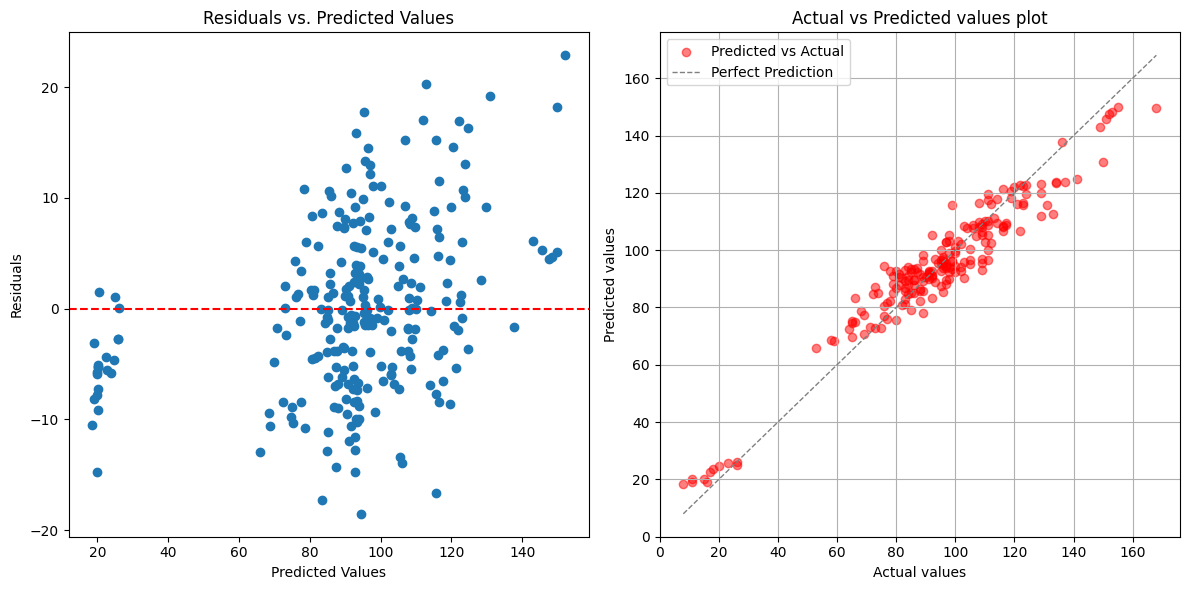

In [22]:
#residual plots
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot



# Residuals
residuals = y_train - y_train_pred

# Plotting the residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')

plt.subplot(1, 2, 2)

y_train = y_train[y_train<1000][:200].to_numpy()
y_train_pred=y_train_pred[y_train_pred<1000][:200]

plt.scatter(y_train, y_train_pred, color='red', label='Predicted vs Actual', alpha=0.5)
print(type(y_train_pred))


#line of prediction
min_val = min(min(y_train), min(y_train_pred))
max_val = max(max(y_train), max(y_train_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='gray', linestyle='--', lw=1, label='Perfect Prediction')


plt.title('Actual vs Predicted values plot')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()